In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last12 = session.query(Measurement.date).filter(Measurement.date > 2019-7-18).order_by(Measurement.date).all()
last12

# Calculate the date 1 year ago from the last data point in the database
year_ago = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.datetime.strptime(year_ago[0], '%Y-%m-%d').date()
one_year = year_ago - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date).order_by(Measurement.prcp.desc())

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date)
precip_year

# Sort the dataframe by date
precip_year_df = pd.DataFrame(precip_year, columns=['Date','Precipitation'])
precip_year_df.head()




,Date,Precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


<function matplotlib.pyplot.show(*args, **kw)>

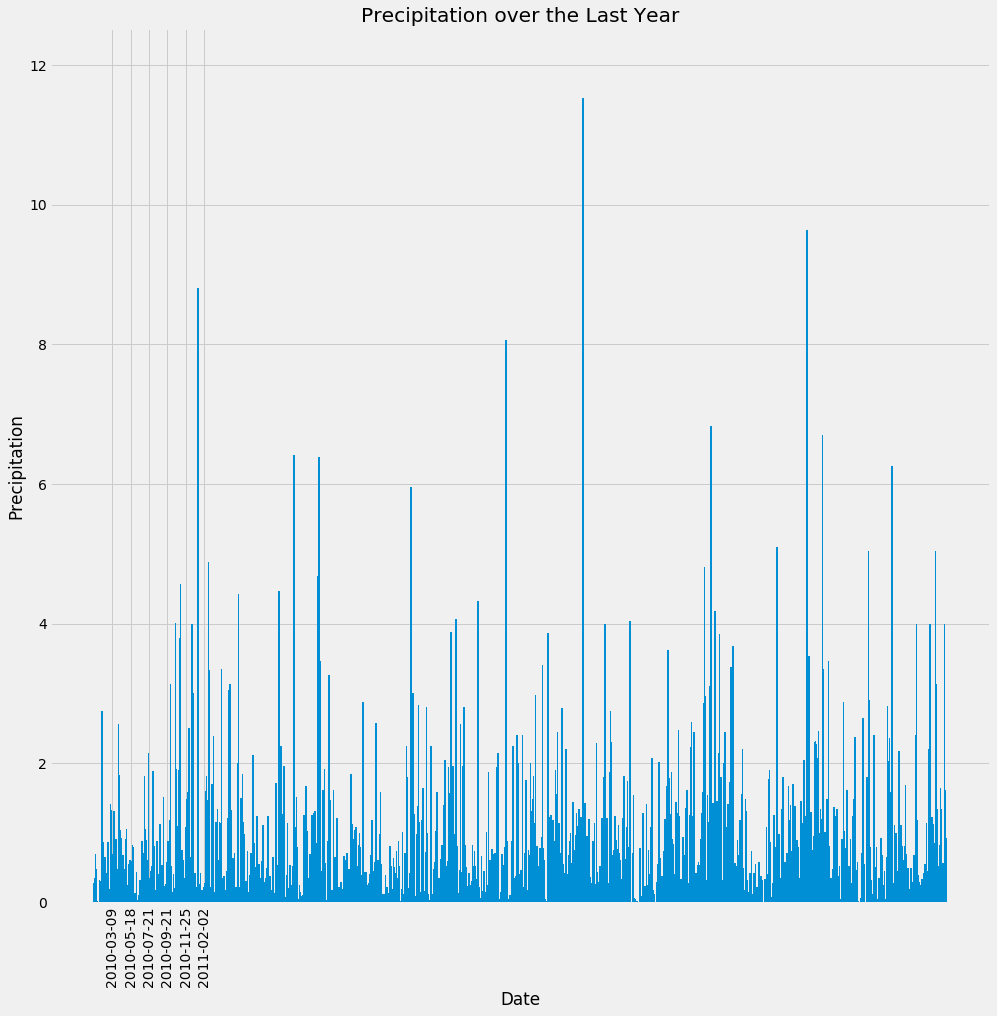

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,15))
plt.bar(precip_year_df["Date"], precip_year_df["Precipitation"], align="center", width=5)
           
# Set x and y limits
plt.ylim(0, max(precip_year_df["Precipitation"])+1)
plt.xticks(range(60,365,60), rotation=90)


# Set a Title and labels
plt.title("Precipitation over the Last Year")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_year_df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [23]:
# Design a query to show how many stations are available in this dataset?
available = session.query(Measurement.station).distinct(Measurement.station).count()
available

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#highest
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station ==active[0][0]).all()
highest_temp

[(85.0)]

In [26]:
#lowest
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station ==active[0][0]).all()
lowest_temp

[(54.0)]

In [29]:
#average
avg_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.station ==active[0][0]).all()
avg_temp

[(71.66378066378067)]

In [31]:
# Choose the station with the highest number of temperature observations.
most_temps = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count
                        (Measurement.station).desc()).first()
most_temps= most_temps[0]


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observations = session.query( Measurement.tobs).filter(Measurement.date >= one_year).filter(Measurement.station
                                                                                            == most_temps).all()
observations = pd.DataFrame(observations, columns=['temperature'])

## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#NOTE: I wasn't sure what dates were being referred to here, so I chose some dates from the past
my_trip = calc_temps('2017-08-01', '2017-08-09')
my_trip


[(71.0, 79.0, 83.0)]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
